In [11]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

1. comparing two data sets (JMA. Argo) and looking at overlaps and gaps
2. creating models to find the best fit model for the KMA data set, to use on the argo data 
3. use only data from JMA that corresponds to the geographic area of the ARGO data set, Then do the same thing as in section 2. 
4. analysis of the best fit models from sections 2 and 3 to see if using data from the same geographic area results in a better model 

In [12]:
infile = 'jma_nitrate.csv'
#####
jma_df = pd.read_csv(infile, sep = (','))

#End the cell by visualising the data variable, if that is what you called it, example:
jma_df.head()

,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,date,year,month,day,profile,cruise,vessel,density
0,0,25.8807,34.0215,0,0.09,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.228287
1,1,25.8993,34.0217,13,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.222695
2,2,25.8843,34.0196,27,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.225773
3,3,25.9894,34.2936,51,0.48,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.395633
4,4,23.6146,34.5002,75,2.71,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,23.263277


In [15]:
#import the jma nitrate file, then get columns I want for training 
infile = 'jma_nitrate.csv'
nitratefile = pd.read_csv(infile, sep = (','))
nitratefilefiltered = nitratefilefiltered[nitratefile.nitrate>0]
x = nitratefilefiltered[["sal","theta"]]
y = nitratefilefiltered[["nitrate"]]
print(np.shape(x))
print(np.shape(y))


#split data set to train/test 20/80 split:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


(15574, 2)
(15574, 1)


C:\Users\olson-keatinge\AppData\Local\Temp\ipykernel_14608\628996830.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nitratefilefiltered = nitratefilefiltered[nitratefile.nitrate>0]


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

#create layers_saved and results to keep track of the nodes and connections 
layers_saved = []
results = []
for nodes in range(7,10,1):
    for layers in range(7,10,1):
        layers_saved.append(nodes) 

        mlp = MLPRegressor(hidden_layer_sizes=layers_saved, max_iter=500, random_state=4)
        #max_iterations 500 means repeat 500 times to find best fit but dont go longer than that
        mlp.fit(x_train, y_train)
        trainres = mlp.score(x_train, y_train)
        predictions = mlp.predict(x_test)
        accresults = mlp.score(x_test, y_test)
        res = [nodes, layers, trainres, accresults]
        results.append(res)
    layers_saved = []
print(results) 

c:\Users\olson-keatinge\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\olson-keatinge\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\olson-keatinge\.conda\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\olson-keatinge\.conda\envs\sklearn-env\Lib\site-packages\skle

[[7, 7, 0.9162687294076185, 0.9213543007174793], [7, 8, 0.9157024890919858, 0.9207134615736476], [7, 9, 0.9198097029562033, 0.9250881620892377], [8, 7, 0.8714871377146776, 0.8776441310213711], [8, 8, 0.9197392507654927, 0.9243773039688101], [8, 9, 0.9189544956150362, 0.9237015546806409], [9, 7, 0.9142692845904898, 0.918218149615439], [9, 8, 0.9146041230363338, 0.9187622669459593], [9, 9, 0.9213352586464023, 0.9263302297201945]]


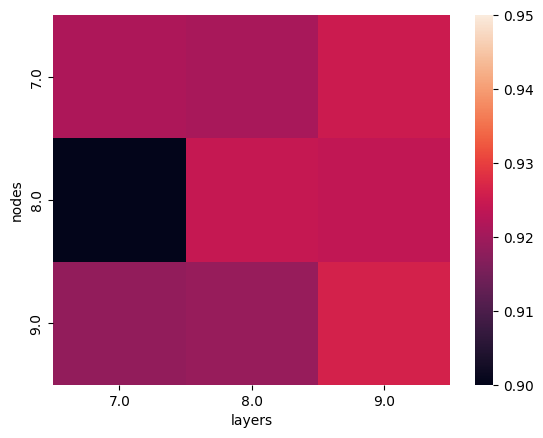

In [20]:
import seaborn as sns
myarray = np.array(results)

data = pd.DataFrame({'nodes': myarray[:,0],'layers': myarray[:,1], '2':myarray[:,3]})
data_pivoted = data.pivot(index='nodes', columns='layers', values='2')
ax = sns.heatmap(data_pivoted, vmin=0.9,vmax=0.95)
plt.show()


We made a neural network of 9 diff models, changing number of layers and nodes each time linking temp, salinity, nitrogen. MLP regressor for x and y variables 

